In [5]:
### cite as "NCEI Volcano Location Database. NOAA National Centers for Environmental Information."
### cite Smithonian national Volcano institute
### cite all Python packages and libraries used
### additional citations may be needed
## volcano eruption data smithsonian dataset
## volcano population data smithsonion
## volcano hazard data NCEI
### Matteo C.

##### 'kestrel_hawkeye'

### INSTALL LIBRARIES ###
#pip install Basemap
#pip install geopandas
!pip install basemap-data-hires

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 91.1/91.1 MB 9.6 MB/s eta 0:00:00


In [ ]:
import pandas as pd
import geopandas as gpd
import numpy as np
import seaborn as sns
from numpy.ma.core import size
import matplotlib.pyplot as plt
from mpl_toolkits.basemap import Basemap
from mpl_toolkits.mplot3d import Axes3D
from matplotlib.font_manager import FontEntry
from matplotlib.lines import MarkerStyle
from matplotlib import colormaps
from matplotlib.colors import Colormap

In [ ]:
kestrel = pd.read_csv("volcano_smithsonian_pop.csv") ### REPLACE .csv FILES WITH ORIGINAL DATASET WHEN TURNING IN PROKECT
eruption_data = pd.read_csv("eruptions_smithsonian.csv")
volcano_sparrow = pd.read_csv("NCEI_volcano_haz.csv")

In [47]:
df_complete = pd.read_csv("kestrel_hawkeye_NEWEST.csv")

In [56]:
### VIEW DATASETS in pandas dataframe ###
## volcano with population - Smithsonian
df_complete.head()

,Volcano Number,Volcano Name,Country,First Eruption Year,Last Eruption Year,Eruption Count,AVG VEI,MAX VEI,Total Deaths,AVG erup (days),...,Pop. 30km,Pop. 100 km,Subregion,Primary Volcano Type,Elevation (m),Tectonic Settings,Major Rock 1,Latitude,Longitude,Region
0,343060,475,27,450.0,1880.0,2,4.50,6.0,30000.0,86.0,...,2948989,6689160,30,0,450,6,2,13.672,-89.053,14
1,341060,739,55,-7350.0,1952.0,11,3.33,4.0,103.0,3292.0,...,5783287,5783287,56,31,3860,6,0,19.850,-101.750,14
2,211010,185,50,-8480.0,1538.0,20,3.36,5.0,30.0,7.0,...,3006865,6019697,46,0,458,6,10,40.827,14.139,11
3,273070,1082,67,-3580.0,2022.0,39,2.45,6.0,1741.0,39.0,...,2380326,24814047,55,0,311,6,0,14.002,120.993,16
4,211020,1223,50,-6940.0,1944.0,61,2.98,5.0,6906.0,2949.0,...,3907941,6009961,46,22,1281,6,5,40.821,14.426,11


In [ ]:
## Eruptions for each volcano - Smithsonian
eruption_data.head()

In [ ]:
## volcano casualties - NCEI
volcano_sparrow

In [ ]:
### CHECK FOR MISSING DATA ###
for col in kestrel.columns:
  pct_null = np.mean(kestrel[col].isnull())
  print('{}' - '{}'.format(col, pct_null))

#for col in eruption_data.columns:
 # pct_null = np.mean(eruption_data[col].isnull())
  #print('{}' - '{}'.format(col, pct_null))

#for col in volcano_sparrow.columns:
 # pct_null = np.mean(volcano_sparrow[col].isnull())
  #print('{}' - '{}'.format(col, pct_null))

In [ ]:
### CHECK FOR DUPLICATES ###

kestrel.drop_duplicates

In [37]:
### CHECK DATA TYPES ###
df_complete.dtypes
#eruption_data.dtypes
#volcano_sparrow.dtypes

Volcano Number                 int64
Volcano Name                  object
Country                       object
First Eruption Year          float64
Last Eruption Year           float64
Eruption Count                 int64
AVG VEI                      float64
MAX VEI                      float64
Total Deaths                 float64
AVG erup (days)              float64
AVG Erup intervel (years)     object
New Feature                  float64
Population within 5 km         int64
Pop 10km                       int64
Pop 30km                       int64
Pop 100 km                     int64
Subregion                     object
Primary Volcano Type          object
Elevation (m)                  int64
Tectonic Settings             object
Major Rock 1                  object
Latitude                     float64
Longitude                    float64
Region                        object
dtype: object

In [ ]:
## CHANGING DATATYPES ##

df_complete['Total Deaths'] = df_complete['Total Deaths'].astype('int64')
df_complete['Pop 10km'] = df_complete['Pop 10km'].astype('int64')
df_complete['Pop 30km'] = df_complete['Pop 30km'].astype('int64')
df_complete['Pop 100km'] = df_complete['Pop 100km'].astype('int64')

In [ ]:
### COMBINING DATASETS AND CREATING NEW FEATURES ###

# Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["VEI"].mean().reset_index()
# Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
# Rename
combined_data.rename(columns={"VEI": "Average VEI"}, inplace=True)

# Total Deaths
total_deaths_per_volcano = volcano_sparrow.groupby("Volcano Name")["Total Deaths"].sum().reset_index()
combined_data = combined_data.merge(total_deaths_per_volcano, on="Volcano Name", how="left")
combined_data.rename(columns={"Total Deaths": "Total Deaths"}, inplace=True)

# Largest VEI
max_vei = eruption_data.groupby("Volcano Name")["VEI"].max().reset_index()
combined_data = combined_data.merge(max_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")

# Eruption Count
eruption_counts = eruption_data.groupby("Volcano Name").size().reset_index(name="eruption_count")
combined_data = combined_data.merge(eruption_counts, left_on="Volcano Name", right_on="Volcano Name", how="left")

# First Eruption year
first_er = eruption_data.groupby("Volcano Name")["Start Year"].min().reset_index()
combined_data = combined_data.merge(first_er, left_on="Volcano Name", right_on="Volcano Name", how="left")

# Group by Volcano Name and find Average VEI
average_vei = eruption_data.groupby("Volcano Name")["days"].mean().reset_index()
# Merge
combined_data = kestrel.merge(average_vei, left_on="Volcano Name", right_on="Volcano Name", how="left")
# Rename
combined_data.rename(columns={"days": "AVG erup (days)"}, inplace=True)

In [ ]:
### FINAL COMPLETE DATASET ###

## ---->> !! ## INSERT already complete .csv file 'kestrel_hawkeye' ON COMPUTER ##
df_complete = "kestrel_complete.csv"

combined_data.to_csv(df_complete, index=False)

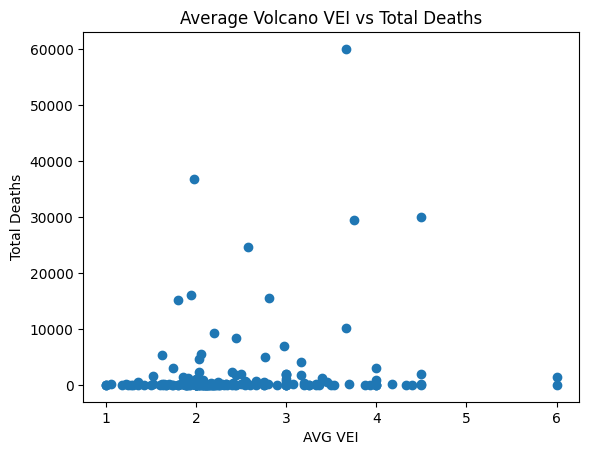

In [48]:
### SCATTER PLOT ###

plt.scatter(x=df_complete['AVG VEI'], y=df_complete['Total Deaths'])

plt.title('Average Volcano VEI vs Total Deaths')

plt.xlabel('AVG VEI')

plt.ylabel('Total Deaths')

plt.show()

<Axes: xlabel='AVG VEI', ylabel='Total Deaths'>

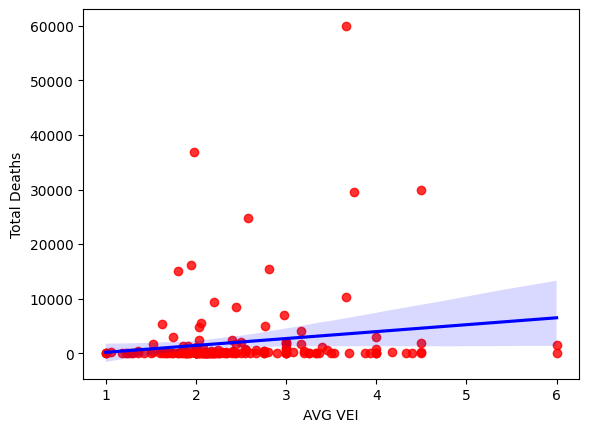

In [49]:
### seaborn scatter plot ###

sns.regplot(x='AVG VEI', y='Total Deaths', data=df_complete, scatter_kws={"color": "red"}, line_kws={"color":"blue"})

<ipython-input-50-809d248a6e35>:12: MatplotlibDeprecationWarning: The get_cmap function was deprecated in Matplotlib 3.7 and will be removed two minor releases later. Use ``matplotlib.colormaps[name]`` or ``matplotlib.colormaps.get_cmap(obj)`` instead.
  cmap = plt.cm.get_cmap('YlOrRd')


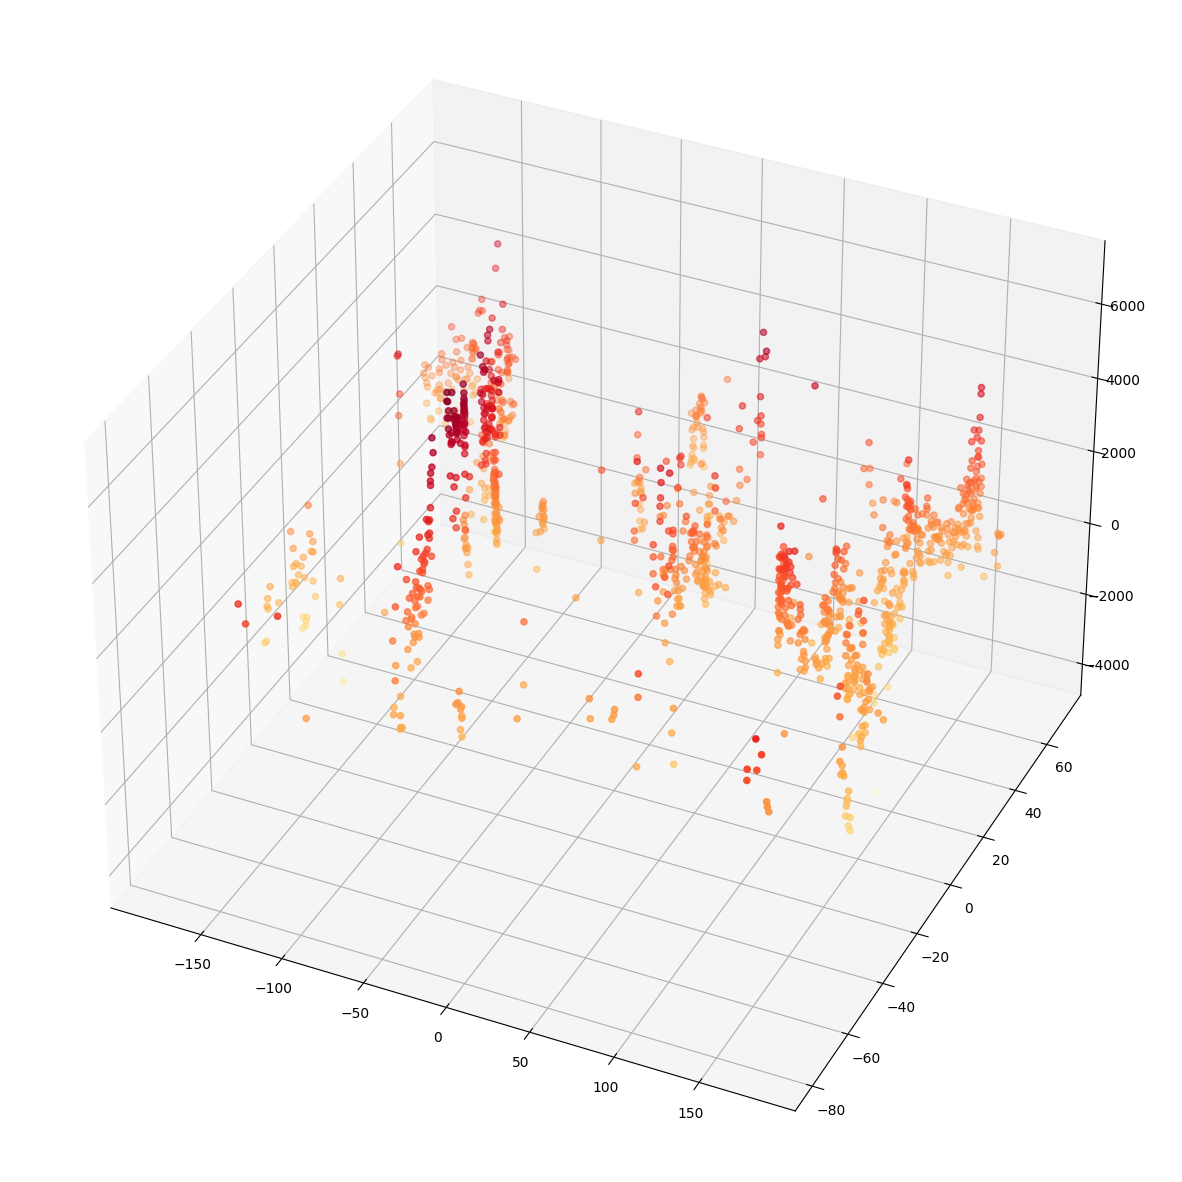

In [50]:
### 3D SCATTER PLOT AND HEATMAP ###

fig = plt.figure(figsize=(15,25))
ax = fig.add_subplot(111, projection='3d')
#plt.figure(figsize=(20, 10))
# Define the x, y, and z coordinates of the volcanoes
x = df_complete['Longitude']
y = df_complete['Latitude']
z = df_complete['Elevation (m)']

### colormap
cmap = plt.cm.get_cmap('YlOrRd')

### 3D heatmap
ax.scatter(x, y, z, c=z, cmap=cmap, depthshade=True)

### title and labels
#ax.set_title('3D Heatmap of Volcano Elevations')
#ax.set_xlabel('Longitude')
#ax.set_ylabel('Latitude')
#ax.set_zlabel('Elevation (m)')

ax.view_init(elev=35, azim=-65)

# Show the plot
plt.show()

In [51]:
### CHECKING FOR CORRELATIONS ###

## default correlation method is 'pearson'
# 'pearson', 'kendall', 'spearman'
df_complete.corr(method='pearson')

<ipython-input-51-1e146639d86e>:5: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df_complete.corr(method='pearson')


,Volcano Number,First Eruption Year,Last Eruption Year,Eruption Count,AVG VEI,MAX VEI,Total Deaths,AVG erup (days),New Feature,Population within 5 km,Pop. 10km,Pop. 30km,Pop. 100 km,Elevation (m),Latitude,Longitude
Volcano Number,1.000000,-0.147037,-0.023868,0.011119,0.115623,0.095918,0.012194,0.060078,0.005156,-0.044289,-0.055187,-0.094442,-0.136231,0.283681,-0.030243,-0.482149
First Eruption Year,-0.147037,1.000000,0.379153,-0.249037,-0.290688,-0.396128,-0.072284,-0.069817,-0.084810,-0.047448,-0.044343,-0.034541,-0.038132,-0.187418,-0.236194,0.085030
Last Eruption Year,-0.023868,0.379153,1.000000,0.256071,-0.417739,-0.142572,0.043926,0.054472,0.032760,0.007319,0.016549,0.051312,0.041774,-0.046187,-0.100838,0.074087
Eruption Count,0.011119,-0.249037,0.256071,1.000000,-0.129653,0.249209,0.066185,0.118206,0.096631,-0.006697,0.004689,0.100023,0.096782,0.119449,0.040057,0.050601
AVG VEI,0.115623,-0.290688,-0.417739,-0.129653,1.000000,0.737827,0.162372,-0.012841,0.189644,0.012059,0.012669,-0.036498,-0.077000,0.065701,0.092552,-0.132738
MAX VEI,0.095918,-0.396128,-0.142572,0.249209,0.737827,1.000000,0.303067,0.151365,0.263513,0.018450,0.020551,0.029079,0.002198,0.091054,0.096075,-0.066741
Total Deaths,0.012194,-0.072284,0.043926,0.066185,0.162372,0.303067,1.000000,0.084021,0.287311,0.066530,0.071252,0.092769,0.054284,0.031299,-0.051224,-0.030768
AVG erup (days),0.060078,-0.069817,0.054472,0.118206,-0.012841,0.151365,0.084021,1.000000,0.189677,0.103864,0.109997,0.161668,0.084902,0.036081,0.030615,-0.070239
New Feature,0.005156,-0.084810,0.032760,0.096631,0.189644,0.263513,0.287311,0.189677,1.000000,0.471667,0.498551,0.413116,0.195346,0.034413,-0.004158,-0.025348
Population within 5 km,-0.044289,-0.047448,0.007319,-0.006697,0.012059,0.018450,0.066530,0.103864,0.471667,1.000000,0.979419,0.495667,0.146135,-0.001976,0.005308,-0.002178


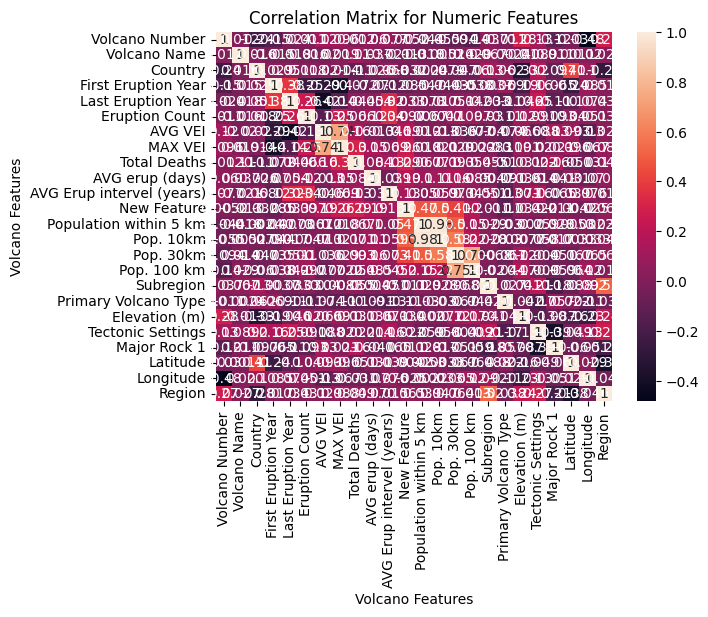

In [63]:
### CORRELATION MATRIX VISUALIZATION ###

corr_matrix = df_complete.corr(method='pearson')

sns.heatmap(corr_matrix, annot=True)

plt.title('Correlation Matrix for Numeric Features')

plt.xlabel('Volcano Features')

plt.ylabel('Volcano Features')


plt.show()

In [ ]:
### TO NUMERIZE ALL COLUMNS FOR CORRELATION MATRIX (changing categorical values as numerical values) ###

df_number = df_complete

for col_name in df_number.columns:
  if(df_number[col_name].dtype == 'object'):
    df_number[col_name] = df_number[col_name].astype('category')
    df_number[col_name] = df_number[col_name].cat.codes

df_number

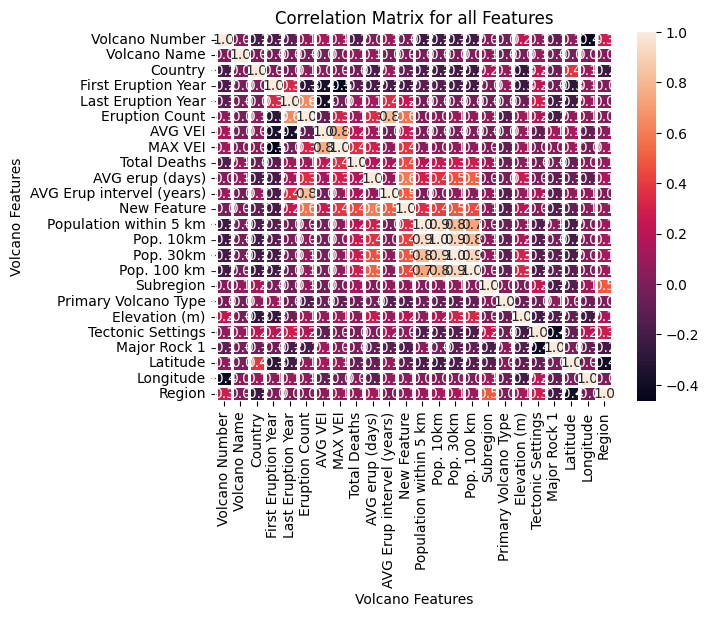

In [126]:
### CORRELATION MATRIX VISUALIZATION WITH ALL FEATURES AS NUMERICAL VALUES ###

corr_matrix = df_number.corr(method='spearman')

sns.heatmap(corr_matrix, annot=True, fmt='.1f', annot_kws={'fontsize': 10}, linewidths= 1, square= False)

plt.title('Correlation Matrix for all Features')

plt.xlabel('Volcano Features')

plt.ylabel('Volcano Features')

#plt.tight_layout()

plt.show()

In [132]:
correlation_volc = df_number.corr()

corr_pairs = correlation_volc.unstack()

corr_pairs

Volcano Number  Volcano Number         1.000000
                Volcano Name           0.012137
                Country               -0.235341
                First Eruption Year   -0.147037
                Last Eruption Year    -0.023868
                                         ...   
Region          Tectonic Settings      0.267434
                Major Rock 1          -0.206912
                Latitude              -0.383963
                Longitude             -0.046153
                Region                 1.000000
Length: 576, dtype: float64

In [131]:
sorted_pairs = corr_pairs.sort_values()

sorted_pairs

Volcano Number      Longitude             -0.482149
Longitude           Volcano Number        -0.482149
Last Eruption Year  AVG VEI               -0.417739
AVG VEI             Last Eruption Year    -0.417739
MAX VEI             First Eruption Year   -0.396128
                                             ...   
Elevation (m)       Elevation (m)          1.000000
Tectonic Settings   Tectonic Settings      1.000000
Major Rock 1        Major Rock 1           1.000000
New Feature         New Feature            1.000000
Region              Region                 1.000000
Length: 576, dtype: float64

In [133]:
high_corr = sorted_pairs[(sorted_pairs) > 0.3]
high_corr

Total Deaths               MAX VEI                      0.303067
MAX VEI                    Total Deaths                 0.303067
AVG Erup intervel (years)  Last Eruption Year           0.321229
Last Eruption Year         AVG Erup intervel (years)    0.321229
AVG Erup intervel (years)  Eruption Count               0.343045
Eruption Count             AVG Erup intervel (years)    0.343045
First Eruption Year        Last Eruption Year           0.379153
Last Eruption Year         First Eruption Year          0.379153
Country                    Latitude                     0.412486
Latitude                   Country                      0.412486
Pop. 30km                  New Feature                  0.413116
New Feature                Pop. 30km                    0.413116
Population within 5 km     New Feature                  0.471667
New Feature                Population within 5 km       0.471667
Population within 5 km     Pop. 30km                    0.495667
Pop. 30km                